In [12]:
# Importing Library
from simpleparamaterisation import TPCevt as TPC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import truncnorm
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal
from ROOT import TFile, TTree


In [2]:
def driftsigma_trans(z, det):
    return np.sqrt(2*z*det.D_xy/det.vdrift)

def driftsigma_long(z, det):
    return np.sqrt(2*z*det.D_z/det.vdrift)
nsigma_extend=3
thresh=1e1

In [77]:
det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")
PrimaryEvt = pd.DataFrame({'x': [1], 'y': [1], 
                        'z': [5], 
                        'Edep': [0.01]})
PrimaryEvt['NIP'] = np.random.poisson(PrimaryEvt['Edep']/det.wval)

In [78]:
PrimaryEvt

,x,y,z,Edep,NIP
0,1,1,5,0.01,1


### Poisson Distribution of NIP List

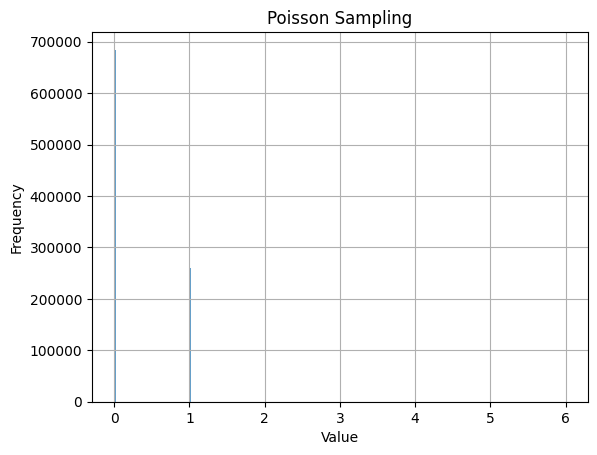

In [79]:
N = 1_000_000
NIP_list = np.random.poisson(PrimaryEvt['Edep']/det.wval, N)
# Plot the data
plt.hist(NIP_list, bins='auto', alpha=0.7, rwidth=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson Sampling')
plt.grid(True)
plt.show()

In [80]:
NIP_list

array([0, 1, 1, ..., 1, 1, 0])

### Gaussian Distribution of Drifted Event

In [63]:
%%timeit
primary_event = np.array(PrimaryEvt).T
NIP = primary_event[4].astype(int)

drifted_event = np.array([
    primary_event[0].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det)).repeat(NIP),
    primary_event[1].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det)).repeat(NIP),
    (primary_event[2].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det)).repeat(NIP))/det.vdrift
])

DriftedEvt = pd.DataFrame({'Pidx' : np.arange(len(NIP)).repeat(NIP), 'x':drifted_event[0], 'y':drifted_event[1], 'dt': drifted_event[2]})

203 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [54]:
a = np.random.normal(loc=0, scale=driftsigma_trans(primary_event[0], det)).repeat(NIP)
print(a.shape)

(387,)


In [57]:
a

array([-2.57900787e-02,  1.16033736e-02, -1.02856245e-02, -2.10450772e-02,
        2.01220731e-02, -1.27501991e-02, -3.69553133e-02,  3.02894290e-02,
        8.72808560e-04,  3.10411983e-02,  2.72113449e-02, -1.07368168e-02,
        4.78199927e-02,  3.33586922e-03, -7.38025424e-03, -1.01186274e-02,
        1.28060107e-02,  3.90483954e-02,  1.18580331e-02, -8.63150203e-03,
        2.19963287e-02,  1.99031510e-02,  1.08879478e-02, -4.62802623e-02,
       -9.28072939e-03,  6.96017195e-03,  2.98542247e-02, -1.26150983e-02,
       -2.57024958e-02, -3.05939670e-02,  2.27808159e-02, -1.12199678e-02,
        7.48655862e-03, -1.15637158e-02,  2.39619630e-03, -1.31936264e-02,
        1.47092748e-02,  1.87102613e-03, -5.11962640e-02,  4.14839259e-03,
       -3.10233220e-02, -6.23925879e-03,  2.69888308e-02, -9.10135101e-03,
       -3.21410414e-02,  1.64934503e-02,  2.72875834e-02,  4.50612346e-02,
        2.69818270e-02, -3.95065839e-02, -2.41587208e-04, -3.17356352e-03,
        1.70261211e-03,  

In [56]:
a = np.random.normal(loc=0, scale=driftsigma_trans(primary_event[0], det), size=len(NIP.repeat(NIP)))
print(a.shape)

(387,)


In [60]:
%%timeit
primary_event = np.array(PrimaryEvt).T
NIP = primary_event[4].astype(int)
NIP_length = len(NIP.repeat(NIP))

drifted_event = np.array([
    primary_event[0].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length),
    primary_event[1].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length),
    (primary_event[2].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length))/det.vdrift
])

DriftedEvt = pd.DataFrame({'Pidx' : np.arange(len(NIP)).repeat(NIP), 'x':drifted_event[0], 'y':drifted_event[1], 'dt': drifted_event[2]})

201 µs ± 7.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [58]:
a

array([-2.57900787e-02,  1.16033736e-02, -1.02856245e-02, -2.10450772e-02,
        2.01220731e-02, -1.27501991e-02, -3.69553133e-02,  3.02894290e-02,
        8.72808560e-04,  3.10411983e-02,  2.72113449e-02, -1.07368168e-02,
        4.78199927e-02,  3.33586922e-03, -7.38025424e-03, -1.01186274e-02,
        1.28060107e-02,  3.90483954e-02,  1.18580331e-02, -8.63150203e-03,
        2.19963287e-02,  1.99031510e-02,  1.08879478e-02, -4.62802623e-02,
       -9.28072939e-03,  6.96017195e-03,  2.98542247e-02, -1.26150983e-02,
       -2.57024958e-02, -3.05939670e-02,  2.27808159e-02, -1.12199678e-02,
        7.48655862e-03, -1.15637158e-02,  2.39619630e-03, -1.31936264e-02,
        1.47092748e-02,  1.87102613e-03, -5.11962640e-02,  4.14839259e-03,
       -3.10233220e-02, -6.23925879e-03,  2.69888308e-02, -9.10135101e-03,
       -3.21410414e-02,  1.64934503e-02,  2.72875834e-02,  4.50612346e-02,
        2.69818270e-02, -3.95065839e-02, -2.41587208e-04, -3.17356352e-03,
        1.70261211e-03,  

In [51]:
DriftedEvt

,Pidx,x,y,dt
0,0,1.027996,0.964701,0.029261
1,0,1.027996,0.964701,0.029261
2,0,1.027996,0.964701,0.029261
3,0,1.027996,0.964701,0.029261
4,0,1.027996,0.964701,0.029261
...,...,...,...,...
382,0,1.027996,0.964701,0.029261
383,0,1.027996,0.964701,0.029261
384,0,1.027996,0.964701,0.029261
385,0,1.027996,0.964701,0.029261


In [52]:
drifted_event[0]

array([1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799597,
       1.02799597, 1.02799597, 1.02799597, 1.02799597, 1.02799

In [64]:
# %%timeit
primary_event = np.array(PrimaryEvt).T
NIP = primary_event[4].astype(int)
NIP_length = len(NIP.repeat(NIP))

drifted_event = np.array([
    primary_event[0].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length),
    primary_event[1].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length),
    (primary_event[2].repeat(NIP) + np.random.normal(loc=0, scale=driftsigma_trans(primary_event[2], det), size=NIP_length))/det.vdrift
])

DriftedEvt = pd.DataFrame({'Pidx' : np.arange(len(NIP)).repeat(NIP), 'x':drifted_event[0], 'y':drifted_event[1], 'dt': drifted_event[2]})

(array([0.42753181, 0.99757421, 1.71012722, 1.71012722, 2.70770144,
        5.27289227, 7.1255301 , 7.69557251, 6.41297709, 8.55063612,
        5.13038167, 3.70527565, 2.28016963, 1.14008482, 0.1425106 ,
        0.1425106 ]),
 array([0.85930476, 0.8774366 , 0.89556844, 0.91370028, 0.93183212,
        0.94996396, 0.9680958 , 0.98622764, 1.00435948, 1.02249131,
        1.04062315, 1.05875499, 1.07688683, 1.09501867, 1.11315051,
        1.13128235, 1.14941419]),
 <BarContainer object of 16 artists>)

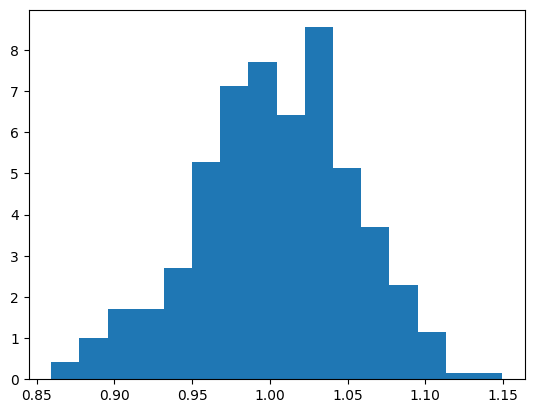

In [68]:
plt.hist(drifted_event[0], bins='auto', density=True)

(array([0.41380924, 0.55174566, 0.41380924, 2.06904622, 3.86221961,
        4.55190168, 6.34507508, 7.03475715, 8.27618488, 7.31062998,
        5.51745659, 3.58634678, 2.20698263, 0.55174566, 0.55174566,
        0.13793641]),
 array([0.84721539, 0.86594851, 0.88468163, 0.90341475, 0.92214787,
        0.94088099, 0.9596141 , 0.97834722, 0.99708034, 1.01581346,
        1.03454658, 1.0532797 , 1.07201282, 1.09074594, 1.10947906,
        1.12821218, 1.1469453 ]),
 <BarContainer object of 16 artists>)

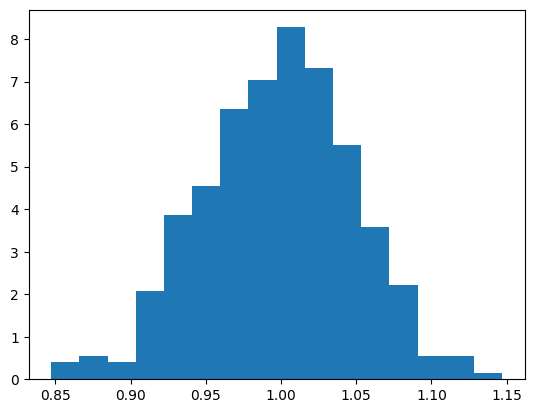

In [69]:
plt.hist(drifted_event[1], bins='auto', density=True)

(array([  24.66569597,   24.66569597,   24.66569597,  221.99126376,
         443.98252752,  937.29644699, 1257.95049465, 1282.61619062,
        1183.95340673, 1430.61036646, 1085.29062283,  616.64239934,
         517.97961544,  246.65695974,  147.99417584,   73.99708792,
          24.66569597]),
 array([0.02852714, 0.0286319 , 0.02873666, 0.02884142, 0.02894618,
        0.02905094, 0.0291557 , 0.02926046, 0.02936522, 0.02946998,
        0.02957474, 0.0296795 , 0.02978426, 0.02988902, 0.02999378,
        0.03009854, 0.0302033 , 0.03030806]),
 <BarContainer object of 17 artists>)

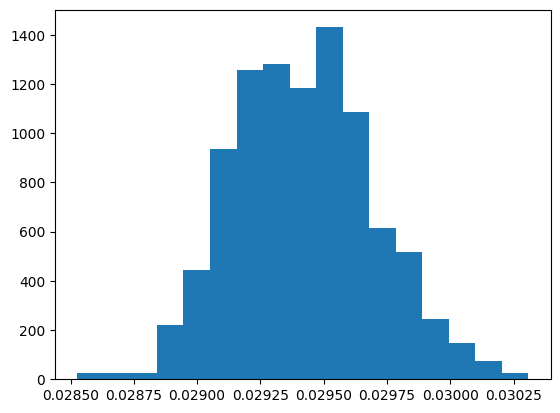

In [70]:
plt.hist(drifted_event[2], bins='auto', density=True)

In [71]:
# %%timeit
# Precompute repeated values
minvals = DriftedEvt.min()
maxvals = DriftedEvt.max()

nsigma_extend = 3
PSFmean_extend = nsigma_extend * det.PSFstd + det.PSFmean
x_range = (minvals['x'] - PSFmean_extend, maxvals['x'] + PSFmean_extend)
y_range = (minvals['y'] - PSFmean_extend, maxvals['y'] + PSFmean_extend)
dt_range = (minvals['dt'] - nsigma_extend * det.gain_sigma_t, maxvals['dt'] + nsigma_extend * det.gain_sigma_t)

# Calculate ReadoutGrid
ReadoutGrid = np.mgrid[
            np.floor(x_range[0] / det.pitch_x) * det.pitch_x:
            np.ceil(x_range[1] / det.pitch_x) * det.pitch_x:
            det.pitch_x,
            np.floor(y_range[0] / det.pitch_y) * det.pitch_y:
            np.ceil(y_range[1] / det.pitch_y) * det.pitch_y:
            det.pitch_y,
            np.floor(dt_range[0] / det.samplerate) * det.samplerate:
            np.ceil(dt_range[1] / det.samplerate) * det.samplerate:
            det.samplerate
            ]

pos = np.stack(ReadoutGrid, axis=3)
ReadoutEvt = None
for i in DriftedEvt.index:
    thisGain = np.random.exponential(scale=det.gain_mean) # bikin gain banyak dulu baru di loop
    rv = multivariate_normal([DriftedEvt.iloc[i]['x'], DriftedEvt.iloc[i]['y'], 
        DriftedEvt.iloc[i]['dt']], np.diag([det.PSFstd, det.PSFstd,det.gain_sigma_t]))
    if ReadoutEvt is None:
        #The factor pitch_x*pitch_y*sample_rate converts from probability density 
        #to 'normalised' probability
        ReadoutEvt = rv.pdf(pos)*det.pitch_x*det.pitch_y*det.samplerate*thisGain
    else:
        ReadoutEvt += rv.pdf(pos)*det.pitch_x*det.pitch_y*det.samplerate*thisGain

#Only record readout elements where Nel > thresh
themask = ReadoutEvt >= thresh
if np.sum(themask) == 0:
    print('No channels above threshold!')
    ReadoutEvt = pd.DataFrame(columns=['x', 'y', 'dt', 'Nel'])
try:
    ReadoutEvt = pd.DataFrame({'x': ReadoutGrid[0][themask].flatten(), 'y': ReadoutGrid[1][themask].flatten(), 
        'dt': ReadoutGrid[2][themask].flatten(), 'Nel': ReadoutEvt[themask]})
except:
    print(f'DriftedEvt: {DriftedEvt}')
    print(f'themask: {themask}\nReadoutGrid[0]: {ReadoutGrid[0]}\nReadoutEvt: {ReadoutEvt}\nReadoutGrid: {ReadoutGrid}')
    print(f'ReadoutGrid.shape: {ReadoutGrid.shape}, ReadoutEvt.shape: {ReadoutEvt.shape}, themask.shape = {themask.shape}')
    raise